In [101]:
import tensorflow as tf
from tensorflow.keras.layers import *

import numpy as np

# Imports PIL module 
from PIL import Image
import matplotlib.pyplot as plt 

import os

In [73]:
raw_dir = "./train_test_data/class_raw/"
other_dir = "./train_test_data/class_other/"
cool_dir = "./train_test_data/class_cool/"

image_size = 256
batch_size = 16

In [78]:
raw_images = [raw_dir + i for i in os.listdir(raw_dir)]
other_images = [other_dir + i for i in os.listdir(other_dir)]
cool_images = [cool_dir + i for i in os.listdir(cool_dir)]

raw_images[:3], other_images[:3], cool_images[:3]

(['./train_test_data/class_raw/10.jpg',
  './train_test_data/class_raw/1005.jpg',
  './train_test_data/class_raw/1006.jpg'],
 ['./train_test_data/class_other/1000.jpg',
  './train_test_data/class_other/1001.jpg',
  './train_test_data/class_other/1002.jpg'],
 ['./train_test_data/class_cool/1.jpg',
  './train_test_data/class_cool/10.jpg',
  './train_test_data/class_cool/1004.jpg'])

In [79]:
len(raw_images), len(other_images), len(cool_images)

(429, 245, 628)

In [81]:
# готовим данные изображений для добавления изображений в модель

data = []
c = 0

for class_ in (raw_images, other_images, cool_images):

    if c == 0:
        y = [c] * len(class_)
    else:
        y.extend([c] * len(class_))

    c += 1

    for image in class_:
        im = Image.open(image)
        im = im.resize((image_size, image_size), resample = Image.Resampling.BILINEAR)
        data.append(im)

data = np.array([np.array(i) for i in data])

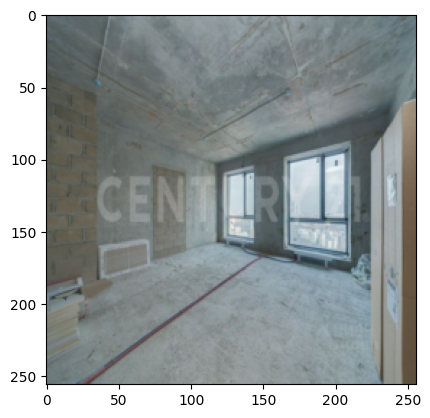

In [84]:
for i in data:
    # print(i[0])
    plt.imshow(i.astype("uint8"))
    break

In [89]:
data = data / 255.

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=123)

In [109]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 3)
y_test_cat = tf.keras.utils.to_categorical(y_test, 3)

In [98]:
X_train.shape

(1041, 256, 256, 3)

In [136]:
model = tf.keras.Sequential([

    RandomBrightness(factor = 0.2, value_range=(0, 1)),
    RandomFlip(mode="horizontal_and_vertical"),

    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3,  activation='softmax')
])


In [137]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)

model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['categorical_accuracy'])

In [138]:
print(model.summary())      # вывод структуры НС в консоль

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [139]:
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), batch_size=batch_size, epochs=10)

model.evaluate(X_test, y_test_cat)


Epoch 1/10
66/66 [==============================] - 35s 509ms/step - loss: 0.9864 - categorical_accuracy: 0.5610 - val_loss: 0.8214 - val_categorical_accuracy: 0.5900
Epoch 2/10
66/66 [==============================] - 33s 507ms/step - loss: 0.7178 - categorical_accuracy: 0.6955 - val_loss: 0.5959 - val_categorical_accuracy: 0.7739
Epoch 3/10
66/66 [==============================] - 34s 517ms/step - loss: 0.6055 - categorical_accuracy: 0.7887 - val_loss: 0.5547 - val_categorical_accuracy: 0.7854
Epoch 4/10
66/66 [==============================] - 34s 508ms/step - loss: 0.5275 - categorical_accuracy: 0.8098 - val_loss: 0.5319 - val_categorical_accuracy: 0.7816
Epoch 5/10
66/66 [==============================] - 33s 507ms/step - loss: 0.4662 - categorical_accuracy: 0.8453 - val_loss: 0.5543 - val_categorical_accuracy: 0.8008
Epoch 6/10
66/66 [==============================] - 34s 510ms/step - loss: 0.4641 - categorical_accuracy: 0.8232 - val_loss: 0.4945 - val_categorical_accuracy: 0.823

[0.47456955909729004, 0.8199234008789062]

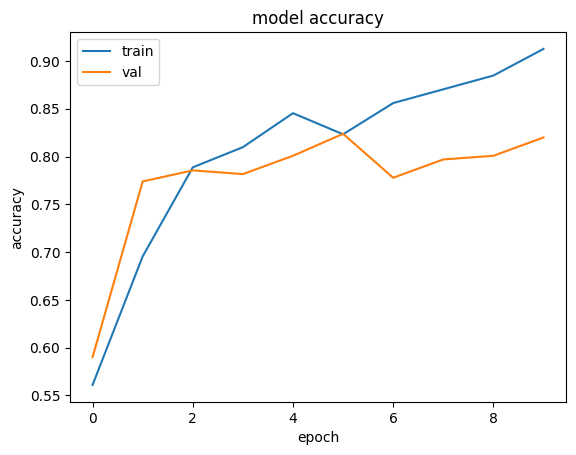

In [140]:

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()